For my response, I will integrate code into the text so it is easy to follow my thought process.

Caveat - I'm currently working at an early-stage startup so spare hours are hard to come by.  I wanted to respect your guidelines and return my response in a timely fashion, but admittedly I would have preferred to have spent more time thinking deeply through your questions.

Question 1:

I have hunches, but I can't really do this question justice without a thorough data dive.  

Intially, I leaned toward naming certain physical attributes (i.e. size, speed) that are "over"valued in some circles, but I wouldn't feel comfortable tagging them as attributes with the "least value". 

With more time, I would gather a database with a list of physical attributes and scouting grades per player and analyze my outcomes of interest (i.e. WAR) in relation to each attribute.

Question 2:



I need to punt this question, unfortuantely, because due to professional reasons I've been more unplugged than I would like from baseball reseach this season.  

If I may, I'll add - the most fascinating research article I've read, period, is "The Injury Zone" by Josh Kalk.  I think this article only scratches the surface on the kind of analysis that can be done with more advanced machine learning methods, and I'd imagine that the Rays (among others) have made great strides in developing this research further in-house.

I think it remains an open question to the degree with which one can predict/prevent pitcher injuries, but teams that can crack this code will be at a significant competitive advantage. 

Question 3:
For this question, I focused on the two projection systems provided by Fangraphs - Zips and Steamer.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import numpy

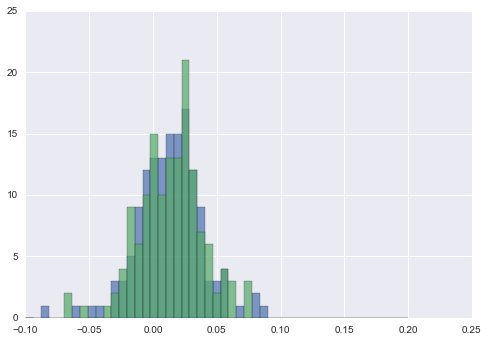

In [3]:
zips_batting = pd.read_csv("Zips-Batting.csv")
zips_pitching = pd.read_csv("Zips-Pitching.csv")
steamer_batting = pd.read_csv("Steamer-Batting.csv")
steamer_pitching = pd.read_csv("Steamer-Pitching.csv")
batting_2016 = pd.read_csv("2016-Batting.csv")
pitching_2016 = pd.read_csv("2016-Pitching.csv")

##subsetting only those with at least 502 PA
batting_2016 = batting_2016.loc[batting_2016['PA']>=502]

##using wOBA as my measure of interest for hitting
zips_batting_mod = zips_batting[zips_batting.columns[[0,20]]]
zips_batting_mod.columns = ['Name', 'zips_wOBA']
steamer_batting_mod = steamer_batting[steamer_batting.columns[[0,21]]]
steamer_batting_mod.columns = ['Name', 'steamer_wOBA']
batting_2016_mod = batting_2016[batting_2016.columns[[0,15]]]
batting_2016_mod.columns = ['Name', '2016_wOBA']

##creating combined df
dfs_hitting = [zips_batting_mod, steamer_batting_mod, batting_2016_mod]
df_hitting = reduce(lambda left, right: pd.merge(left, right, on="Name"), dfs_hitting)

##issue with a couple players  in dataset
df_hitting = df_hitting[df_hitting.Name != "Carlos Gonzalez"]
df_hitting = df_hitting[df_hitting.Name != "Victor Martinez"]

##adding columns to compare projection systems
df_hitting['zips_diff']=df_hitting['2016_wOBA']-df_hitting['zips_wOBA']
df_hitting['steamer_diff']=df_hitting['2016_wOBA']-df_hitting['steamer_wOBA']
df_hitting['projection_diff']=df_hitting['zips_wOBA']-df_hitting['steamer_wOBA']

##visualizing difference between zips and steamer... not much
pyplot.hist(df_hitting['zips_diff'], alpha=.7, bins = numpy.linspace(-.1, .2, 50))
pyplot.hist(df_hitting['steamer_diff'], alpha=.7, bins = numpy.linspace(-.1, .2, 50))
pyplot.show()

In [4]:
df_hitting['zips_diff'].describe()
##mean = 0.013368
##SD = 0.025585
df_hitting['steamer_diff'].describe()
##mean = 0.01434
##SD = 0.02528
df_hitting['projection_diff'].describe()
##mean = 0.000972
##SD = 0.008558

count    144.000000
mean       0.000972
std        0.008558
min       -0.023000
25%       -0.005000
50%        0.001000
75%        0.006000
max        0.026000
Name: projection_diff, dtype: float64

In [5]:
##examining outliers
df_hitting.loc[df_hitting['projection_diff']>=abs(.015)]

,Name,zips_wOBA,steamer_wOBA,2016_wOBA,zips_diff,steamer_diff,projection_diff
0,Bryce Harper,0.430,0.411,0.343,-0.087,-0.068,0.019
6,Chris Davis,0.382,0.358,0.340,-0.042,-0.018,0.024
11,J.D. Martinez,0.370,0.346,0.384,0.014,0.038,0.024
21,Chris Carter,0.358,0.332,0.346,-0.012,0.014,0.026
26,Justin Turner,0.354,0.330,0.353,-0.001,0.023,0.024
34,Yoenis Cespedes,0.343,0.324,0.369,0.026,0.045,0.019
80,Nomar Mazara,0.321,0.306,0.318,-0.003,0.012,0.015
92,Asdrubal Cabrera,0.317,0.301,0.345,0.028,0.044,0.016
101,Odubel Herrera,0.314,0.298,0.338,0.024,0.040,0.016


When it comes to hitting projections, there doesn't appear to be much that differentiates between Zips and Steamer.  Both slightly overestimated wOBA (mean difference of 0.013368 - Zips, 0.01434 - Steamer), and both appear to be roughly equally accurate when looking at the SD of the difference (0.025585 - Zips,  0.02528 - Steamer).

The table above has the hitters where Zips and Steamer differ the most.  It does seem like Steamer is more conservative in its estimates, but it's not clear whether it helps/hurts its cause.  For example, being more conservative with Chris Davis helps Steamer's accuracy, but being more conservative with JD Martinez has Steamer looking worse off.

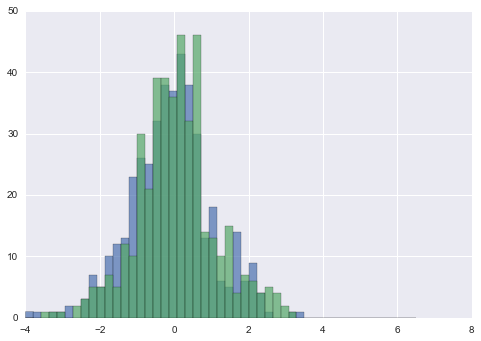

In [6]:
##Pitching
##subsetting only thouse with at least 30 IP
pitching_2016 = pitching_2016.loc[pitching_2016['IP']>=30]

##using WAR as my measure of interest for pitching
zips_pitching_mod = zips_pitching[zips_pitching.columns[[0,17]]]
zips_pitching_mod.columns = ['Name', 'zips_WAR']
steamer_pitching_mod = steamer_pitching[steamer_pitching.columns[[0,18]]]
steamer_pitching_mod.columns = ['Name', 'steamer_WAR']
pitching_2016_mod = pitching_2016[pitching_2016.columns[[0,18]]]
pitching_2016_mod.columns = ['Name', '2016_WAR']

##creating combined df
dfs_pitching = [zips_pitching_mod, steamer_pitching_mod, pitching_2016_mod]
df_pitching = reduce(lambda left, right: pd.merge(left, right, on="Name"), dfs_pitching)

##issue with a couple players  in dataset
df_pitching = df_pitching[df_pitching.Name != "Jose Fernandez"]
df_pitching = df_pitching[df_pitching.Name != "Cody Reed"]

##adding columns to compare projection systems
df_pitching['zips_diff']=df_pitching['2016_WAR']-df_pitching['zips_WAR']
df_pitching['steamer_diff']=df_pitching['2016_WAR']-df_pitching['steamer_WAR']
df_pitching['projection_diff']=df_pitching['zips_WAR']-df_pitching['steamer_WAR']

##visualizing difference between zips and steamer... again, not much
pyplot.hist(df_pitching['zips_diff'], alpha=.7, bins = numpy.linspace(-4, 6.5, 50))
pyplot.hist(df_pitching['steamer_diff'], alpha=.7, bins = numpy.linspace(-4, 6.5, 50))
pyplot.show()

In [7]:
df_pitching['zips_diff'].describe()
##mean = -0.104225
##SD = 1.079425
df_pitching['steamer_diff'].describe()
##mean = 0.046009
##SD = 1.061872
df_pitching['projection_diff'].describe()
##mean = 0.150235
##SD = 0.449902

count    426.000000
mean       0.150235
std        0.449902
min       -1.700000
25%       -0.100000
50%        0.200000
75%        0.400000
max        1.800000
Name: projection_diff, dtype: float64

In [8]:
##examining outliers
df_pitching.loc[df_pitching['projection_diff']>=abs(1.2)]

,Name,zips_WAR,steamer_WAR,2016_WAR,zips_diff,steamer_diff,projection_diff
118,Julio Urias,1.4,0.1,1.8,0.4,1.7,1.3
157,Matt Andriese,1.9,0.4,2.0,0.1,1.6,1.5
200,Jose Berrios,2.1,0.8,-0.4,-2.5,-1.2,1.3
218,Zach Davies,2.0,0.2,2.8,0.8,2.6,1.8
229,Aaron Blair,1.6,0.4,-0.6,-2.2,-1.0,1.2
240,Nick Tropeano,1.5,0.3,0.1,-1.4,-0.2,1.2
250,Steven Brault,1.4,0.0,0.0,-1.4,0.0,1.4
298,Jake Thompson,1.2,0.0,-0.4,-1.6,-0.4,1.2
342,Taylor Rogers,1.2,0.0,0.6,-0.6,0.6,1.2
356,Josh Smith,1.2,0.0,-0.4,-1.6,-0.4,1.2


With pitching, there is slightly more differentiation between the two projection systems.  While both are relatively similar using SD of difference as the measure of accuracy (1.079425 - Zips, 1.061872 - Steamer), Zips appears to slightly overestimate pitching WAR, on average (mean difference of -0.104225 - Zips), while Steamer slightly underestimates pitching WAR (mean difference of 0.046009 - Steamer).

Looking at the outliers in the table above, this difference may be chalked up to Zips being more aggressive in its projection of young, unproven pitchers (i.e. Julio Urias, Jose Berrios).



Question 4a:
Grade the Command for each pitch type that each pitcher throws. 

For this question, I will only focus on pitches that were thrown more than 10 times, to avoid small sample sizes.

Additionally, my grading will be relative to the other pitches/pitchers in the data

In [9]:
#Loading Pitcher Trackman data
pitcher_x_xl = pd.ExcelFile("PitcherX Game.xlsx")
pitcher_x = pitcher_x_xl.parse("Sheet1")
pitcher_y_xl = pd.ExcelFile("PitcherY Game.xlsx")
pitcher_y = pitcher_y_xl.parse("Sheet1")
pitcher_z_xl = pd.ExcelFile("PitcherZ Game.xlsx")
pitcher_z = pitcher_z_xl.parse("TMGamesEddie")

In [12]:
pitcher_x.AutoPitchType.value_counts()

Sinker      54
Fastball    24
Slider       6
ChangeUp     2
Cutter       1
Name: AutoPitchType, dtype: int64

In [13]:
pitcher_y.AutoPitchType.value_counts()

Fastball     80
Curveball    10
Slider        7
ChangeUp      6
Cutter        5
Name: AutoPitchType, dtype: int64

In [14]:
pitcher_z.AutoPitchType.value_counts()

Fastball     47
Curveball    13
ChangeUp     10
Slider        9
Cutter        4
Name: AutoPitchType, dtype: int64

In [15]:
##Fastballs
pitcher_x.loc[(pitcher_x['AutoPitchType'].isin(["Fastball"])) & (pitcher_x['PlateLocSide']>0)].PlateLocSide.std()
##0.49880941296546827
pitcher_x.loc[(pitcher_x['AutoPitchType'].isin(["Fastball"])) & (pitcher_x['PlateLocSide']<0)].PlateLocSide.std()
##0.5877160817614123
pitcher_y.loc[(pitcher_y['AutoPitchType'].isin(["Fastball"])) & (pitcher_y['PlateLocSide']>0)].PlateLocSide.std()
##0.5157722059515756
pitcher_y.loc[(pitcher_y['AutoPitchType'].isin(["Fastball"])) & (pitcher_y['PlateLocSide']<0)].PlateLocSide.std()
##0.41340914284425334
pitcher_z.loc[(pitcher_z['AutoPitchType'].isin(["Fastball"])) & (pitcher_z['PlateLocSide']>0)].PlateLocSide.std()
##0.2848173334145777
pitcher_z.loc[(pitcher_z['AutoPitchType'].isin(["Fastball"])) & (pitcher_z['PlateLocSide']<0)].PlateLocSide.std()
##0.37096712818624117

##Sinker
pitcher_x.loc[(pitcher_x['AutoPitchType'].isin(["Sinker"])) & (pitcher_x['PlateLocSide']>0)].PlateLocSide.std()
##0.39909283524393163
pitcher_x.loc[(pitcher_x['AutoPitchType'].isin(["Sinker"])) & (pitcher_x['PlateLocSide']<0)].PlateLocSide.std()
##0.42033121841442805

##Curveball
pitcher_z.loc[(pitcher_z['AutoPitchType'].isin(["Curveball"])) & (pitcher_z['PlateLocSide']>0)].PlateLocSide.std()
##0.19649576942636876
pitcher_z.loc[(pitcher_z['AutoPitchType'].isin(["Curveball"])) & (pitcher_z['PlateLocSide']<0)].PlateLocSide.std()
##0.22597891798741998

0.22597891798741998

To judge command, I divided pitches into whether they were thrown inside/outside, and then measured the SD, or "spread", of each subset of pitches.  A pitcher with great command will be able to throw in the same location (i.e. paint the corners) successfully, while a pitcher with poor command will miss with pitches either over the center of the plate or significantly inside/outside.

For fastballs, Pitcher Z had the best command while Pitcher X had the worst.

Pitcher X had better command with his sinker, which may explain why the sinker was his dominant pitch thrown.

Finally, Pitcher Z had a remarkable degree of accuracy on his curveball - even more than his fastball, surprisingly.

Question 4b:
Identify each pitcher's out pitch.

In [16]:
pitcher_x.loc[pitcher_x['Strikes']==2].AutoPitchType.value_counts()
pitcher_y.loc[pitcher_y['Strikes']==2].AutoPitchType.value_counts()
pitcher_z.loc[pitcher_z['Strikes']==2].AutoPitchType.value_counts()

Fastball     7
Curveball    2
Slider       2
Name: AutoPitchType, dtype: int64

I identified the "out" pitch as a pitch that would be thrown with two strikes in the count.  From this, the "out pitch" for Pitcher X was the Sinker or Fastball, for Pitcher Y - Fastball, and for Pitcher Z - Fastball.

Question 4c: Grade each pitcher's performance by any metric that you find important.

Release Point

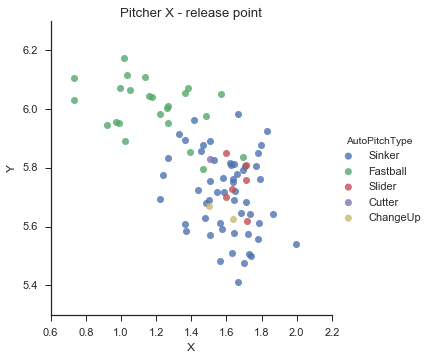

In [17]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('RelSide', 'RelHeight', data = pitcher_x, fit_reg = False, hue = "AutoPitchType", scatter_kws={"marker": "D", "s":50})
plt.title('Pitcher X - release point')
plt.xlabel('X')
plt.ylabel('Y')

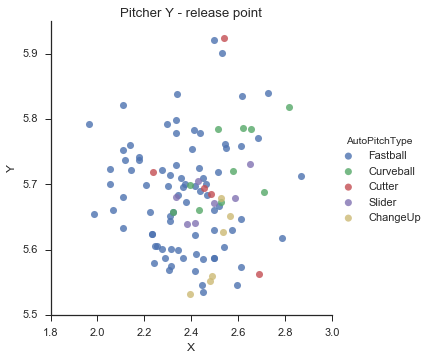

In [18]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('RelSide', 'RelHeight', data = pitcher_y, fit_reg = False, hue = "AutoPitchType", scatter_kws={"marker": "D", "s":50})
plt.title('Pitcher Y - release point')
plt.xlabel('X')
plt.ylabel('Y')

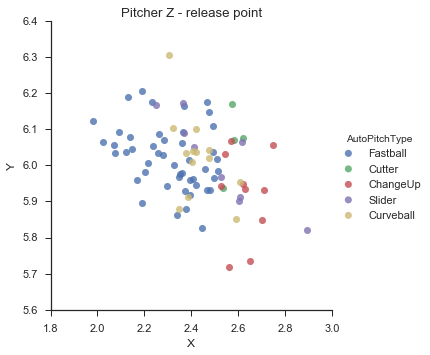

In [19]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('RelSide', 'RelHeight', data = pitcher_z, fit_reg = False, hue = "AutoPitchType", scatter_kws={"marker": "D", "s":50})
plt.title('Pitcher Z - release point')
plt.xlabel('X')
plt.ylabel('Y')

In [20]:
pitcher_x.RelSide.std()
#0.26410376553473164
pitcher_x.RelHeight.std()
#0.17800300305778446
pitcher_y.RelSide.std()
#0.17992749393099092
pitcher_y.RelHeight.std()
#0.08432426747882854
pitcher_z.RelSide.std()
#0.1771552364612607
pitcher_z.RelHeight.std()
#0.10469337574186223

0.10469337574186223

Pitcher Y has the most consistent release point, followed by Z and then X.  The difference between Y and Z is nominal, while Pitcher X appears most likely to be tipping off his pitches with clear indicators for his fastball vs sinker.

Pitch location

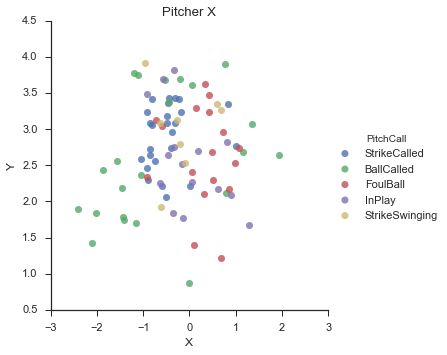

In [21]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('PlateLocSide', 'PlateLocHeight', data = pitcher_x, fit_reg = False, hue = "PitchCall", scatter_kws={"marker": "D", "s":50})
plt.title('Pitcher X')
plt.xlabel('X')
plt.ylabel('Y')

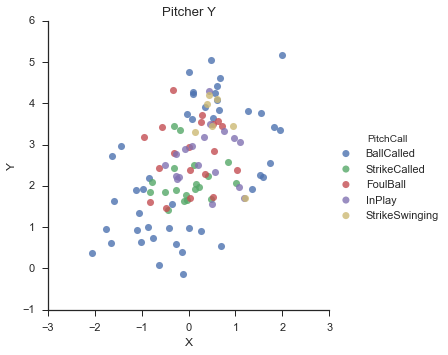

In [22]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('PlateLocSide', 'PlateLocHeight', data = pitcher_y, fit_reg = False, hue = "PitchCall", scatter_kws={"marker": "D", "s":50})
plt.title('Pitcher Y')
plt.xlabel('X')
plt.ylabel('Y')

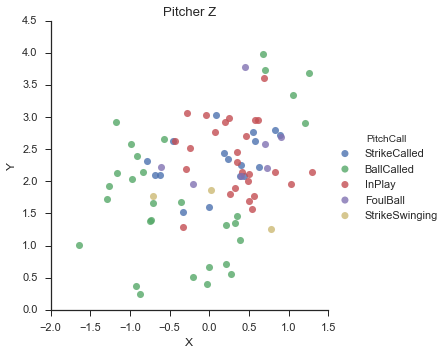

In [23]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('PlateLocSide', 'PlateLocHeight', data = pitcher_z, fit_reg = False, hue = "PitchCall", scatter_kws={"marker": "D", "s":50})
plt.title('Pitcher Z')
plt.xlabel('X')
plt.ylabel('Y')

In [24]:
## looking at pitches in the "middle" of the plate
pitcher_x.loc[(pitcher_x['PlateLocSide']>-.2) & (pitcher_x['PlateLocSide']<.2)].PlateLocSide.count()
##13 out of 87 is ~14.9% of pitches
pitcher_y.loc[(pitcher_y['PlateLocSide']>-.2) & (pitcher_y['PlateLocSide']<.2)].PlateLocSide.count()
##22 out of 108 is ~20.37%
pitcher_z.loc[(pitcher_z['PlateLocSide']>-.2) & (pitcher_z['PlateLocSide']<.2)].PlateLocSide.count()
##9 out of 83 is ~10.84%

9

In [25]:
## looking at pitches well out of the strike zone
pitcher_x.loc[(pitcher_x['PlateLocSide']>1.2) | (pitcher_x['PlateLocSide']<-1.2)].PlateLocSide.count()
##11 out of 87 is ~12.64%
pitcher_y.loc[(pitcher_y['PlateLocSide']>1.2) | (pitcher_y['PlateLocSide']<-1.2)].PlateLocSide.count()
##16 out of 108 is ~14.81%
pitcher_z.loc[(pitcher_z['PlateLocSide']>1.2) | (pitcher_z['PlateLocSide']<-1.2)].PlateLocSide.count()
##6 out of 83 is ~7.23%

6

In [26]:
##the std of pitches inside/outside, by pitcher
pitcher_x.loc[(pitcher_x['PlateLocSide']>0)].PlateLocSide.std()
#0.44908450885521317
pitcher_x.loc[(pitcher_x['PlateLocSide']<0)].PlateLocSide.std()
#0.528462654235448
pitcher_y.loc[(pitcher_y['PlateLocSide']>0)].PlateLocSide.std()
#0.5193228999019741
pitcher_y.loc[(pitcher_y['PlateLocSide']<0)].PlateLocSide.std()
#0.5220021761394646
pitcher_z.loc[(pitcher_z['PlateLocSide']>0)].PlateLocSide.std()
#0.3048767620383258
pitcher_z.loc[(pitcher_z['PlateLocSide']<0)].PlateLocSide.std()
#0.41053588341260083

0.41053588341260083

From the visualizations of pitch location, one can roughly see that pitch accuracy can be ranked by pitcher z, x, y - in that order.  Pitcher Z has clumps of pitches nibbling the strike zone while avoiding the center, while Pitcher Y's location of pitches seems more random.

To back this up with data, I looked at the number of pitches that ended up in the "middle" of the strike zone (defined as -.2 to .2 ft from the center) and the number of pitches that ended up far inside/outside (defined as greater thatn 1.2 ft from the center).  I looked only at pitch location on the X-axis because without batter height info I couldn't quite tell where the strike zone would be vertically for each pitch.

From this data, Pitcher Z is the clear winner - with the fewest pitches in the middle of the strike zone as well as the fewest pitches far inside/outside.

I also looked at the standard devation of pitches thrown inside and outside.  Here, again, Pitcher Z shows the best command with the lowest SD - suggesting greater accuracy and placement of his pitches.

Pitch Outcome

In [27]:
pitcher_x.PitchCall.value_counts()
##87 total pitches
##33 strikes ~37.93%
##22 balls ~25.29%
##17 foul bals ~19.54%
##15 in play ~17.24%
pitcher_y.PitchCall.value_counts()
##108 total pitches
##26 strikes ~24.07%
##45 balls ~41.67%
##19 foul balls ~17.59%
##18 in play ~16.67%
pitcher_z.PitchCall.value_counts()
##83 total pitches
##20 strikes ~24.1%
##30 balls ~36.14%
##7 foul balls ~8.4%
##26 in play ~31.33%

BallCalled        30
InPlay            26
StrikeCalled      17
FoulBall           7
StrikeSwinging     3
Name: PitchCall, dtype: int64

For my final evaluation, I'll go from worst to best.

I like Pitcher Y the least.  His main redeeming quality is his relative consistency in release point.  But his inconsitent command negates this benefit, and when he throws strikes they are thrown too often in the center of the plate.

At first glance, I did not like Pitcher Z.  He is clearly not a strikeout pitcher (only one strikeout in the data), and conventional wisdom steers us toward the pitchers with high K totals.  That said, Pitcher Z clearly has the best command of the three, and he makes up for his suboptimal K-rate by inducing contact on less-than-ideal pitches for the batter.

Conversely, Pitcher X seems ideal at the initial analysis.  He pounds the strike zone most consistenly, and has the highest K-rate of the three pitchers.  However, a deeper dive suggests a potentially serious flaws - he tips off his pitches with inconsistency in release point - a flaw that may be exploited by a more veteran/savvy hitter.

Ultimately, I'd lean toward favoring Pitcher X due to the superior K-rate, but I would be wary on using him if it became apparent that hitters were picking up on the changes in his release point.  I would also lean more toward Pitcher Z if he were backed up by a superior defence that could ably handle his increased number of balls put in play.